### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew, norm, probplot, boxcox, f_oneway

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [47]:
data = pd.read_csv('Data.csv')
users = pd.read_csv('User.csv')
items = pd.read_csv('Item.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [48]:
print("Info\n")
print(data.info())
print(users.info())
print(items.info())
print("\nShape\n")
print(data.shape, users.shape, items.shape)
print("\nDescribe\n")
print(data.describe())
print(users.describe())
print(items.describe())
print("\nMissing Value - Null")
print(data.isnull().sum())
print(users.isnull().sum())
print(items.isnull().sum())

Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        

#### 4. Find the number of movies per genre using the item data - 5 marks

In [49]:
# use sum on the default axis
items.iloc[:,4:22].sum()

Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [50]:
#hint: use sum on the axis = 1
items['multi_genre'] = (items.iloc[:,4:22].agg('sum','columns') > 1)
items[items.multi_genre]['movie title']

0               Toy Story 
1               GoldenEye 
3              Get Shorty 
4                 Copycat 
6          Twelve Monkeys 
               ...        
1667    MURDER and murder 
1668              Tainted 
1671               Mirage 
1677            B. Monkey 
1678        Sliding Doors 
Name: movie title, Length: 849, dtype: object

#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [51]:
items = items[items.unknown != 1]

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [52]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [53]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


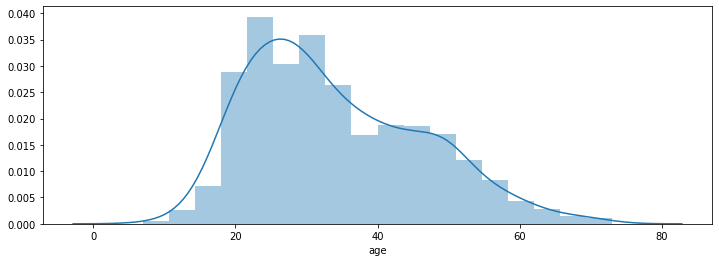

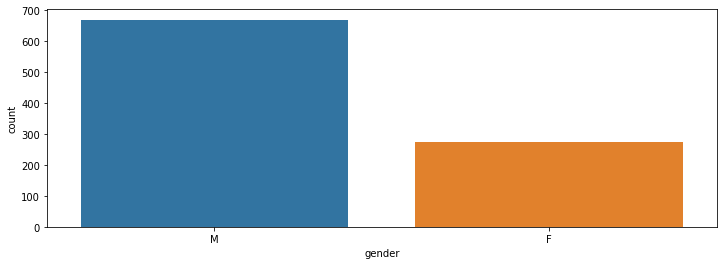

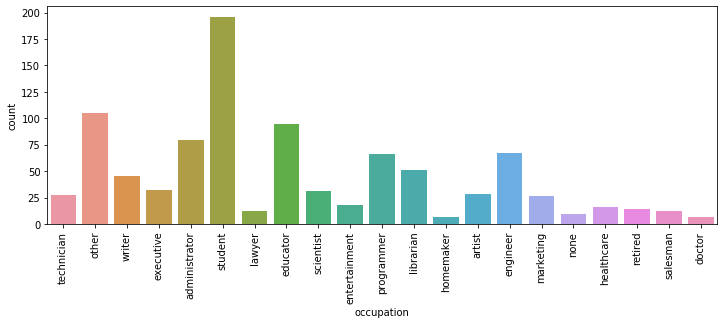

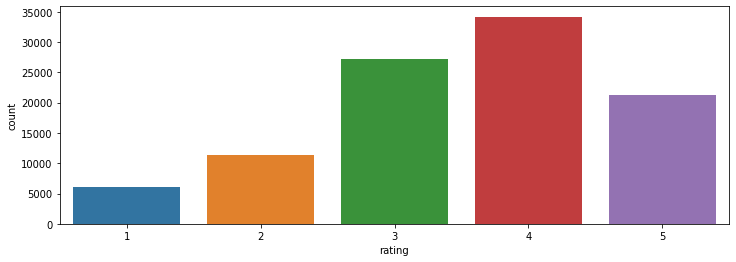

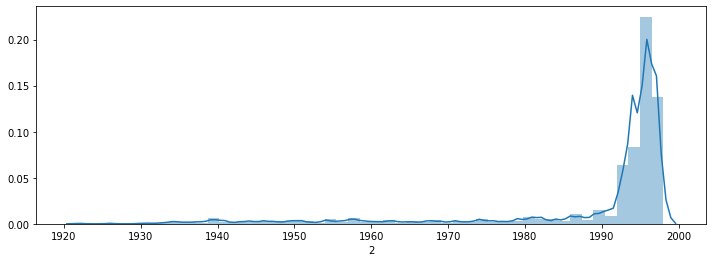

In [54]:
#your answers here
plt.rcParams["figure.figsize"] = (12, 4)
plt.rcParams["xtick.labelsize"] = 10
sns.distplot(users['age']);
plt.show()
sns.countplot(users['gender']);
plt.show()
sns.countplot(users['occupation']);
plt.xticks(rotation='vertical');
plt.show()
sns.countplot(data['rating']);
plt.show()
sns.distplot(items['release date'].str.split('-', expand=True)[2].astype(int));
plt.show()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

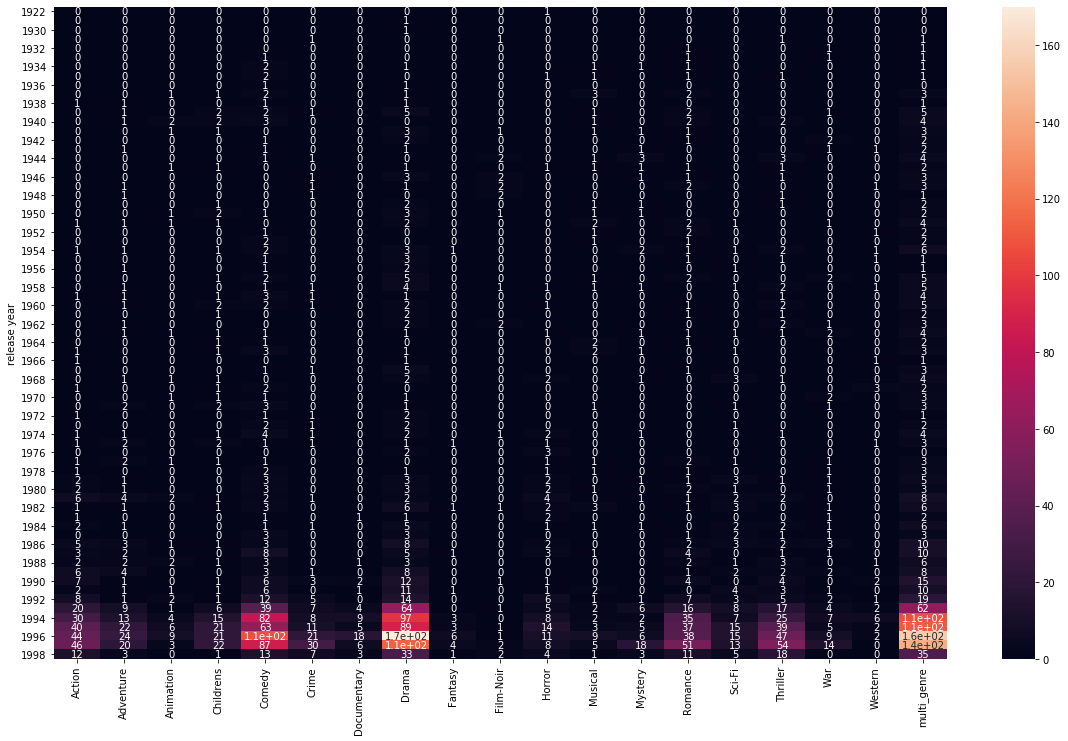

In [55]:
#Your answer here
years = items['release date'].str.split('-', expand=True)[2].astype(int)
items1 = items.iloc[:,3:]
items1.insert(0,'release year', years)
items_by_years = items1.groupby(items1.columns[0])[items1.columns[2:]].sum()
plt.rcParams["figure.figsize"] = (20, 12)
sns.heatmap(items_by_years, annot=True)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [56]:
#your answer here
movie_highly_ranked = pd.DataFrame(data.groupby(['movie id']).sum())
tmp_items_with_rating = pd.merge(left=items, right=movie_highly_ranked, left_on='movie id', right_on='movie id', how='left')
tmp_items_with_rating.sort_values(by=['rating'], inplace=True, ascending=False)
tmp_items_with_rating[['movie title', 'rating']].head(25)

,movie title,rating
49,Star Wars,2541
99,Fargo,2111
180,Return of the Jedi,2032
257,Contact,1936
173,Raiders of the Lost Ark,1786
126,"Godfather, The",1769
284,"English Patient, The",1759
0,Toy Story,1753
97,"Silence of the Lambs, The",1673
286,Scream,1645


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [57]:
data_users = pd.merge(left=data, right=users, left_on='user id', right_on='user id', how='left')
data_users_items = pd.merge(left=data_users, right=items, left_on='movie id', right_on='movie id', how='left')
data_users_items_males = data_users_items[data_users_items.gender == "M"]
data_users_items_females = data_users_items[data_users_items.gender == "F"]
print (data_users_items_males.shape[0], data_users_items_females.shape[0])
print ('Drama', data_users_items_males['Drama'].sum()/data_users_items_males.shape[0], data_users_items_females['Drama'].sum()/data_users_items_females.shape[0])
print ('Sci-Fi', data_users_items_males['Sci-Fi'].sum()/data_users_items_males.shape[0], data_users_items_females['Sci-Fi'].sum()/data_users_items_females.shape[0])
print ('Romance', data_users_items_males['Romance'].sum()/data_users_items_males.shape[0], data_users_items_females['Romance'].sum()/data_users_items_females.shape[0])

# Men watch more drama than women - Ans. False
# Women watch more Sci-Fi than men - Ans. False
# Men watch more Romance than women - Ans. False


74260 25740
Drama 0.3889981147320226 0.42766122766122766
Sci-Fi 0.13602208456773499 0.10213675213675213
Romance 0.1831807164018314 0.2275835275835276
